In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 붓꽃 데이터 로드
iris_path = "/Users/jangsohyun/Desktop/Introduction_to_AI/iris.csv"
iris_df = pd.read_csv(iris_path)

# 특성과 레이블 분리
X = iris_df.iloc[:, :-1].values
Y = iris_df.iloc[:, -1].values 

iris_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# 데이터셋 분할 (80% 학습, 20% 테스트)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=99)

# 데이터 정규화 (KNN은 거리 기반 -> 정규화 필요)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# KNN 모델 생성 (K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# 모델 학습
knn.fit(X_train, Y_train)

# 예측
y_pred = knn.predict(X_test)

# 성능 평가
accuracy = accuracy_score(Y_test, y_pred)
print(f"📌 정확도: {accuracy:.2f}")


📌 정확도: 0.97


In [8]:
# 세부 평가 지표 출력 (target_names 직접 지정)
print("\n📊 분류 보고서 (Classification Report):")
target_names = ["Setosa", "Versicolor", "Virginica"]  # 붓꽃 품종 이름
print(classification_report(Y_test, y_pred, target_names=target_names))


📊 분류 보고서 (Classification Report):
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Versicolor       0.92      1.00      0.96        12
   Virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



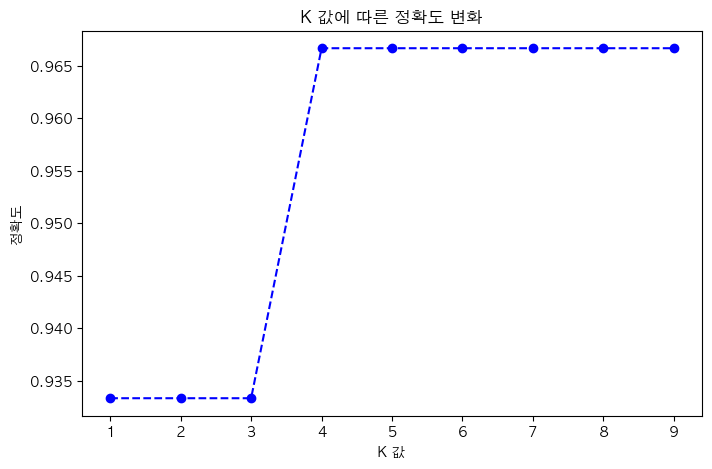

In [11]:
import matplotlib.font_manager as fm
plt.rc('font', family='AppleGothic')

# 9️⃣ K 값에 따른 정확도 변화 시각화
k_values = range(1, 10)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred_k = knn.predict(X_test)
    accuracies.append(accuracy_score(Y_test, y_pred_k))

# 그래프 출력
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel("K 값")
plt.ylabel("정확도")
plt.title("K 값에 따른 정확도 변화")
plt.xticks(k_values)
plt.show()

##########
# 이때 최적의 K값은 4